# Homework Python 3

С базовыми фичами языка можно ознакомиться [в теории](01_tt_python.md).

Для закрепления знаний, решите следующие задачи.

# Задание 1. Word Count

Посчитать сколько раз каждое слово повторялось в тексте. Вывести 10 самых частых слов отсортированных по частоте. Игнорировать однобуквенные слова и пунктуацию. Слова в предложении - это наборы символов отделенные друг от друга пробельными символами (пробел, табуляция, новая строка).

**Hint**: вам понадобится `dict` и метод `get(key)`, который возвращает `None`, если значения отсутсвует.

**Advanced**: Нарисуйте bar-plot график количества слов в предложении. (Используйте библиотеку seaborn)

{'aa': 3, 'cc': 2, 'bb': 1, 'AA': 1}


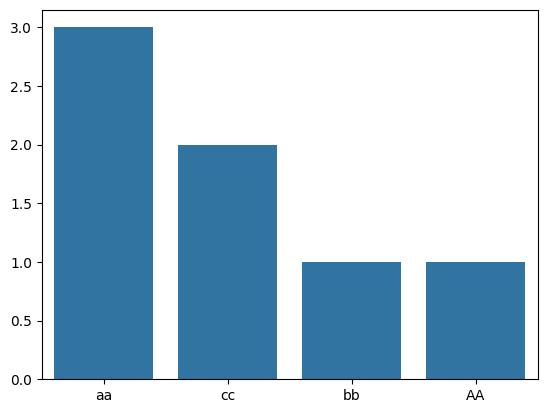

In [11]:
import re

import seaborn as sns


def word_count(text):
    word_freq = dict()
    for word in re.split(r"[^\w]", text):
        if len(word) > 1:
            word_freq[word] = word_freq.get(word, 0) + 1
    top_count = 10
    top = sorted(word_freq.items(), key=lambda k_v: k_v[1], reverse=True)[:top_count]
    top_dict = dict(top)
    print(top_dict)
    sns.barplot(top_dict)


word_count("aa aa aa bb cc cc A B C a AA")

In [13]:
# Это магия для ввода текста, не трогайте её
# Выполните эту ячейку и увидите поле для ввода текста.
# Введите текст, нажмите Enter и получите ответ, который вы вычислили в функции выше
from ipywidgets import widgets

text = widgets.Text(placeholder="тут текст")
display(text)
text.on_submit(lambda txt: word_count(txt.value))

Text(value='', placeholder='тут текст')

/tmp/ipykernel_16783/3831242510.py:8: DeprecationWarning: on_submit is deprecated. Instead, set the .continuous_update attribute to False and observe the value changing with: mywidget.observe(callback, 'value').
  text.on_submit(lambda txt: word_count(txt.value))


# Задание 2. Сумма цифр числа

Посчитать сумму цифр данного натурального числа. Например, `summa(1234) == 1+2+3+4 == 10`.

In [15]:
def summa(n):
    n = str(n)
    s = 0
    for d in n:
        s += int(d)
    return s


print(summa(1234))

10


> Человеку свойственна итерация, рекурсия – удел богов. \(James O. Coplien, Bell Labs\)

In [23]:
def summa_recursive(n, s=0):
    d,*n = str(n)
    n = "".join(n)
    if len(n)==0:
        return s+int(d)
    return summa_recursive(int(n), s + int(d))

print(summa_recursive(1234))

10


# Задание 3. Множество

Это необязательное задание. Но можете сделать для себя, а мы сделаем вам review.

## Теория

Множество - это набор **различных** объектов. Это означает, что в нём нет повторяющихся объектов. `[1,2,3]` - множество, а `[1,2,2,3,1]` - не удовлетворяет определению.

Множество - это абстрактная структура данных и её можно реализовать несколькими способами. Но для начала определим поведения для этой абстракции.

#### Базовые операции:

Этот набор поведений определяет саму абстракцию.

- добавить элемент в множество
- объединить множества
- пересечь множества
- проверка принадлежности элемента множеству

#### Вспомогательные:

Это дополнительные функции. Они просто помогают пользоваться этой абстракцией.

- вычислить длину
- итерация по множеству
- создать множество из списка элементов
- сконвертировать множество в список

### Реализации

По определению, множество предоставляет только одну услугу - хранит только разные элементы. Порядок хранить оно не обязано, доступа по индексу тоже нет. Тогда на основе чего можно построить эту абстракцию?

#### Список

Мы можем создать множества на основе списка и просто проверять при каждой вставке в него то, есть ли в нём уже этот элемент или нет.

Преимущества:
- легко сделать

Недостатки:
- долгий поиск принадлежности и вставки O(n)
- очень долгое пересечение O(n^2)

#### Упорядоченный список

А что если хранить все элементы в списке упорядоченно? Тогда вставка будет занимать меньше времени в среднем: O(n/2). Но это тот же порядок.

#### Деревья поиска

Существует такая структура данных как дерево. Оно было создано специально для решения задачи поиска. В сбалансированном дереве поиск элемента имеет сложность O(log_2(n)), что очень хорошо. Сравните её с O(n):

![](https://habrastorage.org/getpro/habr/post_images/195/e1f/6a1/195e1f6a1379554ca9025338301a78ed.png)

__картинка взята из статьи [bigocheatsheet.com](http://bigocheatsheet.com/)__

Условия бинарного дерева поиска:

- Оба поддерева — левое и правое — являются двоичными деревьями поиска.
- У всех узлов левого поддерева произвольного узла X значения ключей данных меньше, нежели значение ключа данных самого узла X.
- У всех узлов правого поддерева произвольного узла X значения ключей данных больше либо равно, нежели значение ключа данных самого узла X.

Статья на [wiki](https://ru.wikipedia.org/wiki/%D0%94%D0%B2%D0%BE%D0%B8%D1%87%D0%BD%D0%BE%D0%B5_%D0%B4%D0%B5%D1%80%D0%B5%D0%B2%D0%BE_%D0%BF%D0%BE%D0%B8%D1%81%D0%BA%D0%B0).

#### Хэш таблицы

Основная идея заключается в использовании некоторой хэш функции, которая возвращает некоторое число. Это число используется как индекс в массиве. Поэтому операция поиска принадлежности будет O(1). В случае коллизии хэш функции, то есть когда для разных элементов было вычислено одно и то же значение хэш функции, предусматривается некоторое специальное поведение. Например, можно по индексу хэш функции хранить не один элемент, а несколько. Если коллизий очень мало, то поиск принадлежности будет всё тот же O(1) + O(n), где n - количество элементов с одним хешем. Такой метод называется методом цепочек.

Статья на [wiki](https://ru.wikipedia.org/wiki/%D0%A5%D0%B5%D1%88-%D1%82%D0%B0%D0%B1%D0%BB%D0%B8%D1%86%D0%B0)

## Практика

Можно сделать в функциональном, процедурном или ООП стиле.

### Задание 3.1. Множество на основе хеш-таблицы

Используйте массивы python как базовую структуру.
Реализуйте какую-нибудь функцию хеширования: например, остаток от деления на N или [mur-mur](https://ru.wikipedia.org/wiki/Murmur2). Для начала, чтобы тестировать свой код, можете использовать функцию `hash`.

Напишите бенчмарк(замер скорости выполнения) для базовых функций вашего множества.

In [3]:
class HashSet:
    def __init__(self, size=100):
        self.size = size
        self.table = [[] for _ in range(size)] 

    def _hash(self, key):
        return hash(key) % self.size

    def add(self, key):
        index = self._hash(key)
        if key not in self.table[index]:
            self.table[index].append(key)

    def remove(self, key):
        index = self._hash(key)
        if key in self.table[index]:
            self.table[index].remove(key)

    def contains(self, key):
        index = self._hash(key)
        return key in self.table[index]

In [4]:
import time

def benchmark(hash_set, operations):
    start_time = time.time()

    for op, key in operations:
        if op == 'add':
            hash_set.add(key)
        elif op == 'remove':
            hash_set.remove(key)
        elif op == 'contains':
            hash_set.contains(key)

    end_time = time.time()
    return end_time - start_time

hash_set = HashSet(size=1000)

operations = [('add', i) for i in range(10000)]
operations += [('contains', i) for i in range(10000)]
operations += [('remove', i) for i in range(10000)]

elapsed_time = benchmark(hash_set, operations)
print(f"Elapsed time: {elapsed_time:.4f} seconds")


Elapsed time: 0.0266 seconds


### Задание 3.2. Множество на основе дерева

Реализуйте множество на основе бинарного дерева поиска. Если вам понадобится массив, то используйте только ваш список из предыдущей практики.

Напишите бенчмарк(замер скорости выполнения) для базовых функций вашего множества.

Сравните скорость работы каждой реализации множества.

In [5]:
class TreeNode:
    def __init__(self, key):
        self.key = key
        self.left = None
        self.right = None

class TreeSet:
    def __init__(self):
        self.root = None

    def add(self, key):
        if not self.root:
            self.root = TreeNode(key)
        else:
            self._insert(self.root, key)

    def _insert(self, node, key):
        if key < node.key:
            if node.left:
                self._insert(node.left, key)
            else:
                node.left = TreeNode(key)
        elif key > node.key:
            if node.right:
                self._insert(node.right, key)
            else:
                node.right = TreeNode(key)

    def remove(self, key):
        self.root = self._delete(self.root, key)

    def _delete(self, node, key):
        if not node:
            return None
        if key < node.key:
            node.left = self._delete(node.left, key)
        elif key > node.key:
            node.right = self._delete(node.right, key)
        else:
            if not node.left:
                return node.right
            if not node.right:
                return node.left
            min_node = self._find_min(node.right)
            node.key = min_node.key
            node.right = self._delete(node.right, min_node.key)
        return node

    def _find_min(self, node):
        while node.left:
            node = node.left
        return node

    def contains(self, key):
        return self._search(self.root, key)

    def _search(self, node, key):
        if not node:
            return False
        if key == node.key:
            return True
        elif key < node.key:
            return self._search(node.left, key)
        else:
            return self._search(node.right, key)

In [6]:
import time
import random

def benchmark(set_impl, operations):
    start_time = time.time()
    for op, key in operations:
        if op == 'add':
            set_impl.add(key)
        elif op == 'remove':
            set_impl.remove(key)
        elif op == 'contains':
            set_impl.contains(key)
    end_time = time.time()
    return end_time - start_time

def generate_operations(n):
    operations = []
    for _ in range(n):
        op = random.choice(['add', 'remove', 'contains'])
        key = random.randint(0, 10000)
        operations.append((op, key))
    return operations

if __name__ == "__main__":
    n = 10000 
    operations = generate_operations(n)

    hash_set = HashSet(size=1000)
    hash_time = benchmark(hash_set, operations)
    print(f"HashSet time: {hash_time:.4f} seconds")

    tree_set = TreeSet()
    tree_time = benchmark(tree_set, operations)
    print(f"TreeSet time: {tree_time:.4f} seconds")

    if hash_time < tree_time:
        print("HashSet is faster!")
    else:
        print("TreeSet is faster!")

HashSet time: 0.0063 seconds
TreeSet time: 0.0401 seconds
HashSet is faster!


# Задание 4. Матрицы

Реализуйте класс матрица и набор важных функций:

- сложение матриц
- умножение матрицы на число
- матричное произведение
- поиск определителя
- вычисление обратной матрицы
- транспонирование матрицы

Использовать numpy нельзя. Все матричные операции вам надо реализовать полностью самостоятельно.

Класс Matrix должен следовать принципам Data Model: https://docs.python.org/3/reference/datamodel.html

In [7]:
class Matrix:
    def __init__(self, data):
        self.data = data
        self.rows = len(data)
        self.cols = len(data[0]) if self.rows > 0 else 0

    def __repr__(self):
        return f"Matrix({self.data})"

    def __eq__(self, other):
        return self.data == other.data

    def __add__(self, other):
        if self.rows != other.rows or self.cols != other.cols:
            raise ValueError("Matrices must have the same dimensions")
        result = [
            [self.data[i][j] + other.data[i][j] for j in range(self.cols)]
            for i in range(self.rows)
        ]
        return Matrix(result)

    def __mul__(self, scalar):
        result = [
            [self.data[i][j] * scalar for j in range(self.cols)]
            for i in range(self.rows)
        ]
        return Matrix(result)

    def __matmul__(self, other):
        if self.cols != other.rows:
            raise ValueError("Number of columns in the first matrix must equal number of rows in the second")
        result = [
            [
                sum(self.data[i][k] * other.data[k][j] for k in range(self.cols))
                for j in range(other.cols)
            ]
            for i in range(self.rows)
        ]
        return Matrix(result)

    def transpose(self):
        result = [
            [self.data[j][i] for j in range(self.rows)]
            for i in range(self.cols)
        ]
        return Matrix(result)

    def determinant(self):
        if self.rows != self.cols:
            raise ValueError("Matrix must be square")
        if self.rows == 1:
            return self.data[0][0]
        if self.rows == 2:
            return self.data[0][0] * self.data[1][1] - self.data[0][1] * self.data[1][0]
        det = 0
        for c in range(self.cols):
            submatrix = [
                [self.data[i][j] for j in range(self.cols) if j != c]
                for i in range(1, self.rows)
            ]
            det += ((-1) ** c) * self.data[0][c] * Matrix(submatrix).determinant()
        return det

    def inverse(self):
        det = self.determinant()
        if det == 0:
            raise ValueError("Matrix is singular and cannot be inverted")
        if self.rows == 1:
            return Matrix([[1 / self.data[0][0]]])
        cofactors = []
        for r in range(self.rows):
            cofactor_row = []
            for c in range(self.cols):
                minor = [
                    [self.data[i][j] for j in range(self.cols) if j != c]
                    for i in range(self.rows) if i != r
                ]
                cofactor = ((-1) ** (r + c)) * Matrix(minor).determinant()
                cofactor_row.append(cofactor)
            cofactors.append(cofactor_row)
        cofactors = Matrix(cofactors).transpose()
        return cofactors * (1 / det)

In [8]:
m1 = Matrix([[1, 2], [3, 4]])
m2 = Matrix([[5, 6], [7, 8]])
print("m1 + m2:", m1 + m2)
print("m1 * 2:", m1 * 2)
print("m1 @ m2:", m1 @ m2)
print("Transpose of m1:", m1.transpose())
print("Determinant of m1:", m1.determinant())
print("Inverse of m1:", m1.inverse())

m1 + m2: Matrix([[6, 8], [10, 12]])
m1 * 2: Matrix([[2, 4], [6, 8]])
m1 @ m2: Matrix([[19, 22], [43, 50]])
Transpose of m1: Matrix([[1, 3], [2, 4]])
Determinant of m1: -2
Inverse of m1: Matrix([[-2.0, 1.0], [1.5, -0.5]])


# Список.

## Теория

Мы пойдем весьма необычным путём. В этом задании вы будете реализовывать последовательность(связный список) с помощью рекурсии и базового элемента `tuple`. Это отличается от классического связного списка, основанного на структуре и указателе `next`, когда обход бы делался с помощью `for`, пока не встретился бы _null pointer_.

Немного теории. Допустим у нас есть связная последовательность чисел ![](https://senior-sigan.ml/fcs-programming-technology/assets/linked_list.png)

Её можно представить в виде последовательности вложенных друг в друга пар: `seq=(1, (2, (3, 4)))`. Тогда чтобы взять последний элемент списка нужно сделать `seq[1][1][1]`. Или если создать специальную вспомогательную функцию `tail`: `tail(tail(tail(seq)))`, что немного математичнее.

> Использовать цикл `for`, `while` **запрещено**. Только рекурсия, только хардкор.

Можно использовать классы и переопределять операторы, но не обязательно. Как делать классы можно прочитать [тут](https://learnxinyminutes.com/docs/ru-ru/python3-ru/) или в официальной [документации](https://docs.python.org/3/tutorial/classes.html).

_Комментарий:_ ваш список должен уметь быть пустым, чтобы его длина была 0. Это потребуется в следующем задании.

Далее список задач и примеры функций. Если вы делаете в ООП стиле, то придумайте методы самостоятельно, главное чтобы идея была такая же.

### Рекурсивно связная последовательность. Easy.

- взятие элемента по индексу `at(seq(1,2,3), 1) == 2`
- вычисление длины последовательности `size(seq(1,2)) == 2`
- сравнение массивов `eq(seq(1,2), seq(1,2)) == Treu`, `eq(seq(1,2,3), seq(1,2)) == False`

### Функции над рекурсивно связаной последовательностью. Moderate.

- взятие хвоста последовательности, пропустив N значений, `eq(tail(seq(1,2,3,4), 2), seq(3,4)) == True`
- соединение двух списков `eq(concat(seq(1,2), seq(3,4)), seq(1,2,3,4)) == True`
- функция `for_each` для обхода списка `for_each(seq(1,2,3,4), lambda x: print(x))`
- функция `for_each_indexed` для обхода списка с индексом `for_each(seq(1,2,3,4), lambda i, x: print(i, x))`

### Трансформаторы, фильтры, свёртки рекурсивных списков. Hard.

- функция преобразования `map`: `map(seq(1,2,3,4), lambda x: x**2) == seq(1,4,9,16)`
- функция фильтрации `filter`: `filter(seq(1,2,3,4),lambda x: x%2==1) == seq(1,3)`
- функция редуцирования `reduce`: `reduce(s=seq(1,2,3,4), init_value=0, func=lambda acc, cur: acc+cur) == 0+1+2+3+4==10`
- на основе функции редуцирования сделать функцию конвертации последовательности в python list `list(seq(1,2,3,4)) == [1,2,3,4]`

### Дополнительное задание, если интересно:

- на основе функции редуцирования сделать функцию flat_map, которая превращает последовательность последовательностей в последовательность. `flat_map(seq(1,2,3), lambda x: seq(x, x + 10)) == seq(1, 11, 2, 12, 3, 13)`

In [10]:
# Воспользуйтесь этим начальным кодом, чтобы реализовать нужный процедуры


def head(pair):
    if pair is None:
        return None
    return pair[0]


def tail(pair):
    if pair is None:
        return None
    if len(pair) < 2:
        return None
    return pair[1]


def Seq(*elements):
    def first(x):
        return x[0]

    def other(x):
        return x[1:]

    if len(elements) == 0:
        return None

    if len(elements) == 1:
        return first(elements), None

    if len(elements) == 2:
        return first(elements), other(elements)

    return first(elements), Seq(*other(elements))


s = Seq(1, 2, 3, 4, 5)
s == (1, (2, (3, (4, (5,)))))
head(s) == 1
tail(s) == (2, (3, (4, (5,))))

True

In [12]:
def at(seq, index):
    if seq is None:
        raise IndexError("Index out of range")
    if index == 0:
        return head(seq)
    return at(tail(seq), index - 1)


def size(seq):
    if seq is None:
        return 0
    return 1 + size(tail(seq))


def eq(seq1, seq2):
    if seq1 is None and seq2 is None:
        return True
    if seq1 is None or seq2 is None:
        return False
    return head(seq1) == head(seq2) and eq(tail(seq1), tail(seq2))


def tail_n(seq, n):
    if seq is None or n == 0:
        return seq
    return tail_n(tail(seq), n - 1)


def concat(seq1, seq2):
    if seq1 is None:
        return seq2
    return head(seq1), concat(tail(seq1), seq2)


def for_each(seq, func):
    if seq is None:
        return
    func(head(seq))
    for_each(tail(seq), func)


def for_each_indexed(seq, func, index=0):
    if seq is None:
        return
    func(index, head(seq))
    for_each_indexed(tail(seq), func, index + 1)


def map_seq(seq, func):
    if seq is None:
        return None
    return func(head(seq)), map_seq(tail(seq), func)


def filter_seq(seq, predicate):
    if seq is None:
        return None
    if predicate(head(seq)):
        return head(seq), filter_seq(tail(seq), predicate)
    return filter_seq(tail(seq), predicate)


def reduce_seq(seq, init_value, func):
    if seq is None:
        return init_value
    return reduce_seq(tail(seq), func(init_value, head(seq)), func)


def to_list(seq):
    return reduce_seq(seq, [], lambda acc, cur: acc + [cur])


def flat_map(seq, func):
    if seq is None:
        return None
    mapped = func(head(seq))
    return concat(mapped, flat_map(tail(seq), func))


s = Seq(1, 2, 3, 4, 5)
print("Sequence:", s)
print("Head:", head(s))
print("Tail:", tail(s))
print("Element at index 2:", at(s, 2))
print("Size:", size(s))
print("Equality:", eq(s, Seq(1, 2, 3, 4, 5)))
print("Tail after skipping 2 elements:", tail_n(s, 2))
print("Concatenation:", concat(s, Seq(6, 7)))
print("Map (square):", map_seq(s, lambda x: x**2))
print("Filter (odd):", filter_seq(s, lambda x: x % 2 == 1))
print("Reduce (sum):", reduce_seq(s, 0, lambda acc, cur: acc + cur))
print("To list:", to_list(s))
print("Flat map:", flat_map(s, lambda x: Seq(x, x + 10)))

Sequence: (1, (2, (3, (4, (5,)))))
Head: 1
Tail: (2, (3, (4, (5,))))
Element at index 2: 3
Size: 5
Equality: True
Tail after skipping 2 elements: (3, (4, (5,)))
Concatenation: (1, (2, (3, (4, (5, (6, (7,)))))))
Map (square): (1, (4, (9, (16, (25, None)))))
Filter (odd): (1, (3, (5, None)))
Reduce (sum): 15
To list: [1, 2, 3, 4, 5]
Flat map: (1, (11, (2, (12, (3, (13, (4, (14, (5, (15, None))))))))))
